In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fuzzywuzzy
import re
from collections import Counter
import seaborn as sns
import math

In [2]:
df = pd.read_csv("airplane_crashes_and_fatalities_since_1908.csv")

In [3]:
#Clean up time 
df["Time"] = df["Time"].replace(np.nan, "Unknown") 
df["Time"] = df["Time"].str.replace("114:20:00", "Unknown")
df["Time"] = df["Time"].str.replace("18.40", "18:40")
df["Time"] = df["Time"].str.replace("0943", "09:43")
df["Time"] = df["Time"].str.replace("12\'20", "12:20")
df["Time"] = df["Time"].str.replace("22\'08", "22:08")
df["Time"] = df["Time"].str.replace("c: ", "")
df["Time"] = df["Time"].str.replace("c:", "")
df["Time"] = df["Time"].str.replace("c", "")

#Match upper/lower case formats
df = df.applymap(lambda s:s.upper() if type(s) == str else s)

#Create new columns for month, day, year, hour, and minute
    
df['Date']=pd.to_datetime(df['Date'])
df['Day'] = df['Date'].map(lambda x: x.day)
df['Year'] = df['Date'].map(lambda x: x.year)
df['Month'] = df['Date'].map(lambda x: x.month)

# Drop NaN values

In [5]:
df1 = df[['Year', 'Operator', 'Aboard', 'Fatalities', 'Summary']].dropna(subset=['Operator', 'Aboard', 'Fatalities', 'Summary'])
df1.head(5)

,Year,Operator,Aboard,Fatalities,Summary
0,1908,MILITARY - U.S. ARMY,2.0,1.0,"DURING A DEMONSTRATION FLIGHT, A U.S. ARMY FLY..."
1,1912,MILITARY - U.S. NAVY,5.0,5.0,FIRST U.S. DIRIGIBLE AKRON EXPLODED JUST OFFSH...
2,1913,PRIVATE,1.0,1.0,THE FIRST FATAL AIRPLANE ACCIDENT IN CANADA OC...
3,1913,MILITARY - GERMAN NAVY,20.0,14.0,THE AIRSHIP FLEW INTO A THUNDERSTORM AND ENCOU...
4,1913,MILITARY - GERMAN NAVY,30.0,30.0,HYDROGEN GAS WHICH WAS BEING VENTED WAS SUCKED...


# Military DataFrame

In [7]:
df_military = df1[df1["Operator"].str.contains("MILITARY")]
df_military

,Year,Operator,Aboard,Fatalities,Summary
0,1908,MILITARY - U.S. ARMY,2.0,1.0,"DURING A DEMONSTRATION FLIGHT, A U.S. ARMY FLY..."
1,1912,MILITARY - U.S. NAVY,5.0,5.0,FIRST U.S. DIRIGIBLE AKRON EXPLODED JUST OFFSH...
3,1913,MILITARY - GERMAN NAVY,20.0,14.0,THE AIRSHIP FLEW INTO A THUNDERSTORM AND ENCOU...
4,1913,MILITARY - GERMAN NAVY,30.0,30.0,HYDROGEN GAS WHICH WAS BEING VENTED WAS SUCKED...
5,1915,MILITARY - GERMAN NAVY,41.0,21.0,CRASHED INTO TREES WHILE ATTEMPTING TO LAND AF...
6,1915,MILITARY - GERMAN NAVY,19.0,19.0,"EXPLODED AND BURNED NEAR NEUWERK ISLAND, WHEN..."
7,1916,MILITARY - GERMAN ARMY,20.0,20.0,"CRASHED NEAR THE BLACK SEA, CAUSE UNKNOWN."
8,1916,MILITARY - GERMAN NAVY,22.0,22.0,SHOT DOWN BY BRITISH AIRCRAFT CRASHING IN FLAMES.
9,1916,MILITARY - GERMAN NAVY,19.0,19.0,SHOT DOWN IN FLAMES BY THE BRITISH 39TH HOME D...
10,1916,MILITARY - GERMAN ARMY,28.0,27.0,CRASHED IN A STORM.


In [17]:
m_fatalities_count = df_military.groupby(["Year"])['Fatalities'].sum()
m_totals_count = df_military.groupby(["Year"])['Aboard'].sum()
m_fatality_rate = m_fatalities_count / m_totals_count
year = df_military.groupby(["Year"])["Year"].sum()


KeyError: 'Year'

In [10]:
df2_military = pd.DataFrame({"Fatality Rate": m_fatality_rate})
df2_military

,Fatality Rate
Year,
1908,0.500000
1912,1.000000
1913,0.880000
1915,0.666667
1916,0.990826
1917,1.000000
1918,1.000000
1921,1.000000
1922,0.755556


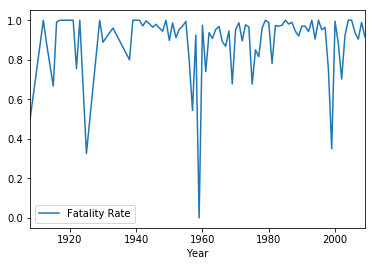

In [152]:
military_chart = df2_military.plot(kind="line")

In [153]:
df2_military.head(5)

,Fatality Rate
Year,
1908,0.500000
1912,1.000000
1913,0.880000
1915,0.666667
1916,0.990826


In [159]:
df2_military['Fatality Rate']

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [59]:
sns.regplot(x = , y = , data = df2_military)

TypeError: regplot() missing 1 required positional argument: 'y'

# Commercial DataFrame

In [54]:
df_commercial = df1[df1["Operator"].str.contains("MILITARY") == False]

In [55]:
c_fatalities_count = df_commercial.groupby(["Year"])['Fatalities'].sum()
c_totals_count = df_commercial.groupby(["Year"])['Aboard'].sum()
c_fatality_rate = c_fatalities_count / c_totals_count

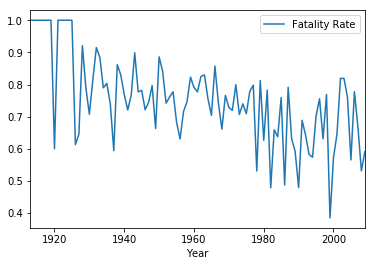

In [166]:
df2_commercial = pd.DataFrame({"Fatality Rate": c_fatality_rate})
commercial_chart = df2_commercial.plot(kind = "line")
plt.show()